<font size=8> F-I curve test

In [1]:
#Common Python Packages
from pickle import TRUE
import time
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd() + '/..')

#dynapse2 spikegen imports
from lib.dynapse2_util import *
from lib.dynapse2_network import Network
from lib.dynapse2_spikegen import send_events,get_fpga_time, send_virtual_events, poisson_gen, isi_gen,regular_gen
from lib.dynapse2_raster import *
from lib.dynapse2_obj import *

#Statistics imports
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression

#my imports
from configs.neuron_configs import neuron_configs
from adaptation import pc_single,ff,pc_pv_sst
from adaptation_lib.spike_stats import *
from adaptation_lib.dynapse_setup import *
from adaptation_lib.graphing import *
from adaptation_lib.tc_extraction import *


In [2]:
[board,profile_path,number_of_chips]=obtain_board()

Setting Latches
Setting up network
Adding connections

Setting monitors
20 100 15

PC Neurons

[169, 180, 183, 194, 203, 165, 171, 181, 195, 222, 149, 156, 164, 179, 205, 206, 217, 226, 148, 157, 158, 210, 232, 245, 246, 131, 152, 161, 163, 167, 173, 176, 198, 200, 209, 233, 113, 146, 170, 190, 192, 197, 229, 247, 249, 115, 118, 139, 141, 143, 159, 160, 166, 186, 202, 213, 218, 107, 134, 151, 155, 162, 177, 191, 216, 225, 243, 116, 126, 130, 140, 145, 168, 175, 182, 185, 187, 224, 129, 147, 150, 172, 241, 70, 114, 121, 132, 178, 212, 100, 119, 124, 133, 174, 199, 84, 108, 120, 125, 137]

PV Neurons

[255, 252, 202, 233, 239, 223, 206, 238, 251, 173, 207, 253, 254, 186, 199, 221, 235, 237, 191, 213]

PV Neurons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

All configurations done!

Input events created
initilize run dynapse
initilize run dynapse

getting fpga time


setting virtual neurons

Simulation done
PC_CV_average: 0.0 PV_CV_average: 0.13 SST_CV_average: 0.56
PC_synchrony: 

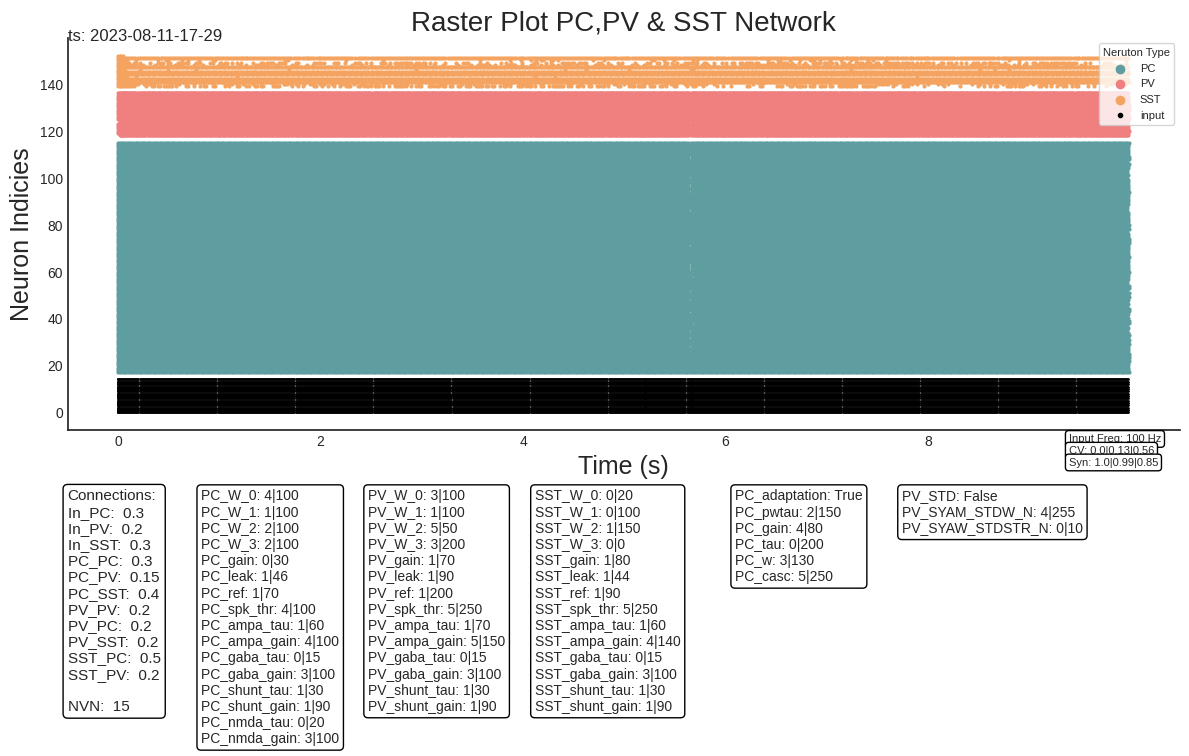

In [3]:

neuron_config=neuron_configs()
neuron_config['PC_W0']=[4,100]# PC input
neuron_config['PC_W1']=[1,100]#recurrent PC to PC
neuron_config['PC_W2']=[2,100]#PV shunt inhibition to PC
neuron_config['PC_W3']=[2,100]#SST gaba inhibition to PC

neuron_config['PV_W1']=[1,100]#PC_to PV
neuron_config['PV_W2']=[5,50]#PV gaba inhibition to PV
neuron_config['PV_W3']=[3,200]#SST gaba inhibition to PV

neuron_config['SST_W0']=[0,20]#input
neuron_config['SST_W1']=[0,100]#PC to SST
neuron_config['SST_W2']=[1,150]#PV shunt inhibition to SST

neuron_config['nvn']=15
neuron_config['pcn']=100
neuron_config['pvn']=20
neuron_config['sstn']=15

neuron_config['SST_AMPA_GAIN']=[4,140]

neuron_config['Input_PC']=.3
neuron_config['Input_SST']=.3#.1#.1
neuron_config['Input_PV']=.2#.2

neuron_config['PC_PC']=.3
neuron_config['PC_PV']=.15#.1
neuron_config['PC_SST']=.4#.1

neuron_config['PV_PC']=.2#0
neuron_config['PV_PV']=.2#.2
neuron_config['PV_SST']=.2#.2

neuron_config['SST_PC']=.5#.1
neuron_config['SST_PV']=.2#.2

neuron_config['PC_Adaptation']=True
neuron_config['duration']=10
neuron_config['input_type']='Regular'
neuron_config['in_freq']=100

[output_events,test_config]=pc_pv_sst.pc_pv_sst(board=board, profile_path=profile_path, number_of_chips=number_of_chips,neuron_config=neuron_config)
[cv_values,synchrony_values]=run_dynamic_anal(output_events,test_config)
if 'raster_fig' in locals() and raster_fig is not None:
    raster_fig.savefig('raster_previous.png')
if 'fvt_fig' in locals() and fvt_fig is not None:
    fvt_fig.savefig('fvt_previous.png')
raster_fig=script_annotated_raster_plot(test_config,output_events,neuron_config,cv_values=cv_values,syn_values=synchrony_values,save=True,annotate=False,annotate_network=True)
fvt_fig=frequency_vs_time_plot(frequency_over_time(test_config,output_events),test_config,save=True,annotate=False,show=True)
raster_fig.savefig('raster_current.png')
fvt_fig.savefig('fvt_current.png')



In [9]:
import random
import timeout_decorator

def randomize_config(neuron_config):
    neuron_config['PC_W0'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['PC_W1'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['PC_W2'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['PC_W3'] = [random.randint(0, 5), random.randint(5, 255)]

    neuron_config['PV_W1'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['PV_W2'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['PV_W3'] = [random.randint(0, 5), random.randint(5, 255)]

    neuron_config['SST_W0'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['SST_W1'] = [random.randint(0, 5), random.randint(5, 255)]
    neuron_config['SST_W2'] = [random.randint(0, 5), random.randint(5, 255)]

    neuron_config['nvn'] = 15
    neuron_config['pcn'] = 100
    neuron_config['pvn'] = 20
    neuron_config['sstn'] = 15

    neuron_config['SST_AMPA_GAIN'] = [random.randint(0, 5), random.randint(5, 255)]

    neuron_config['Input_PC'] = random.uniform(0, .5)
    neuron_config['Input_SST'] = random.uniform(0, .5)
    neuron_config['Input_PV'] = random.uniform(0, .5)

    neuron_config['PC_PC'] = random.uniform(0, .5)
    neuron_config['PC_PV'] = random.uniform(0, .5)
    neuron_config['PC_SST'] = random.uniform(0, .5)

    neuron_config['PV_PC'] = random.uniform(0, .5)
    neuron_config['PV_PV'] = random.uniform(0, .5)
    neuron_config['PV_SST'] = random.uniform(0, .5)

    neuron_config['SST_PC'] = random.uniform(0, .5)
    neuron_config['SST_PV'] = random.uniform(0, .5)

    neuron_config['PC_Adaptation'] = True
    neuron_config['duration'] = 10
    neuron_config['input_type'] = 'Regular'
    neuron_config['in_freq'] = 100

    return neuron_config


neuron_config=neuron_configs()
@timeout_decorator.timeout(40)  # Set a 5-second timeout
def run_simulation(neuron_config):
    return pc_pv_sst.pc_pv_sst(
        board=board,
        profile_path=profile_path,
        number_of_chips=number_of_chips,
        neuron_config=neuron_config
    )

successful_simulations = 0

for i in range(1000):  # Example: Keep trying different configurations until 100 successful simulations
    neuron_config = randomize_config(neuron_config)  # Assuming you've updated randomize_config without an argument
    try:
        [output_events, test_config] = run_simulation(neuron_config)
        [cv_values, synchrony_values] = run_dynamic_anal(output_events, test_config)
        raster_fig = script_annotated_raster_plot(test_config, output_events, neuron_config, cv_values=cv_values, syn_values=synchrony_values, save=True, annotate=False, annotate_network=True)
        fvt_fig = frequency_vs_time_plot(frequency_over_time(test_config, output_events), test_config, save=True, annotate=False, show=True)
        raster_fig.savefig(f'raster_current.png')
        fvt_fig.savefig(f'fvt_curernt.png')
        print(f"Simulation {successful_simulations + 1} completed successfully!")
        successful_simulations += 1
        
        if successful_simulations >= 100: # Stop after 100 successful simulations
            break

    except timeout_decorator.TimeoutError:
        print("Simulation timed out, trying again with new parameters...")

print("Completed 100 successful simulations.")


TypeError: randomize_config() missing 1 required positional argument: 'neuron_config'